In [2]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('login.csv')

In [4]:
customerKey=data['customerKey'][0]
customerSecret=data['customerSecret'][0]
accessToken=data['accessToken'][0]
accessSecret=data['accessSecret'][0]

In [5]:
#create authenticate object
authenticate = tweepy.OAuthHandler(customerKey, customerSecret)
#set accessToken & accessSecret
authenticate.set_access_token(accessToken, accessSecret)
#create API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [7]:
#get the Bitcoin tweets(3000)
search_item = '#bitcoin -filter:retweets'
#create cursor object
tweets = tweepy.Cursor(api.search, q=search_item, lang='en', since = '2020-02-01', tweet_mode= 'extended').items(3000)
#store tweet and get full text
all_tweets = [tweet.full_text for tweet in tweets]

In [8]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head()

,Tweets
0,@Breaking911 really... great. Monthly #bitcoin...
1,"@Allgamestoken This is a very, very good proje..."
2,"@LizWhee72161237 Hey, thanks for sharing this ..."
3,$btc #bitcoin near trendline resistance https:...
4,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀\nEntry Price: 1...


In [9]:
#Clean tweets
def cleanTweets(tweets, pattern):
    r = re.findall(pattern, tweets)
    for word in r:
        tweets = re.sub(word,"",tweets)
    return tweets

In [10]:
# df['Tweets'] = np.vectorize(cleanTweets)(df['Tweets'], 'https?:\/\/\S+')
df['Tweets'] = np.vectorize(cleanTweets)(df['Tweets'], '@[\w]*')
df['Tweets'] = np.vectorize(cleanTweets)(df['Tweets'], '\\n')
df.head(10)

,Tweets
0,really... great. Monthly #bitcoin buys for te...
1,"This is a very, very good project ... I wish ..."
2,"Hey, thanks for sharing this thread from . Re..."
3,$btc #bitcoin near trendline resistance https:...
4,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀Entry Price: 12....
5,A #Bitcoin prediction by the GOAT himself: htt...
6,Cobalt is the “blood diamond “♦️ of the minera...
7,Iran has banned crypto mining which is set to ...
8,Volcano #bitcoin mining comming soon https://t...
9,Hey Brian when are you going to unlock my Bi...


In [11]:
# remove Special characters
df['CleanTweets'] = df['Tweets'].str.replace("[^a-zA-Z0-9#]"," ")
df['CleanTweets'] = df['Tweets'].str.replace('https?:\/\/\S+', ' ')
df.head(10)

,Tweets,CleanTweets
0,really... great. Monthly #bitcoin buys for te...,really... great. Monthly #bitcoin buys for te...
1,"This is a very, very good project ... I wish ...","This is a very, very good project ... I wish ..."
2,"Hey, thanks for sharing this thread from . Re...","Hey, thanks for sharing this thread from . Re..."
3,$btc #bitcoin near trendline resistance https:...,$btc #bitcoin near trendline resistance
4,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀Entry Price: 12....,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀Entry Price: 12....
5,A #Bitcoin prediction by the GOAT himself: htt...,A #Bitcoin prediction by the GOAT himself:
6,Cobalt is the “blood diamond “♦️ of the minera...,Cobalt is the “blood diamond “♦️ of the minera...
7,Iran has banned crypto mining which is set to ...,Iran has banned crypto mining which is set to ...
8,Volcano #bitcoin mining comming soon https://t...,Volcano #bitcoin mining comming soon
9,Hey Brian when are you going to unlock my Bi...,Hey Brian when are you going to unlock my Bi...


In [12]:
df['CleanTweets'] = df['Tweets'].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))
df.head()

,Tweets,CleanTweets
0,really... great. Monthly #bitcoin buys for te...,really... great. Monthly #bitcoin buys tens th...
1,"This is a very, very good project ... I wish ...","This very, very good project wish good luck ac..."
2,"Hey, thanks for sharing this thread from . Re...","Hey, thanks sharing this thread from Read whol..."
3,$btc #bitcoin near trendline resistance https:...,$btc #bitcoin near trendline resistance https:...
4,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀Entry Price: 12....,$HNT Long Position(v1) 🚀🚀🚀Entry Price: 12.103T...


In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
tokenized_tweet = df['CleanTweets'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0    [really..., great., Monthly, #bitcoin, buys, t...
1    [This, very,, very, good, project, wish, good,...
2    [Hey,, thanks, sharing, this, thread, from, Re...
3    [$btc, #bitcoin, near, trendline, resistance, ...
4    [$HNT, Long, Position(v1), 🚀🚀🚀Entry, Price:, 1...
5    [#Bitcoin, prediction, GOAT, himself:, https:/...
6    [Cobalt, “blood, diamond, mineral, world., Eve...
7    [Iran, banned, crypto, mining, which, last, fo...
8    [Volcano, #bitcoin, mining, comming, soon, htt...
9    [Brian, when, going, unlock, BinanceUS, accoun...
Name: CleanTweets, dtype: object

In [15]:
from nltk.stem.porter import PorterStemmer
stemmer  = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_tweet.head()

0    [really..., great., monthli, #bitcoin, buy, te...
1    [thi, very,, veri, good, project, wish, good, ...
2    [hey,, thank, share, thi, thread, from, read, ...
3    [$btc, #bitcoin, near, trendlin, resist, https...
4    [$hnt, long, position(v1), 🚀🚀🚀entri, price:, 1...
Name: CleanTweets, dtype: object

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['CleanTweets'] = tokenized_tweet
df.head()

,Tweets,CleanTweets
0,really... great. Monthly #bitcoin buys for te...,really... great. monthli #bitcoin buy ten thou...
1,"This is a very, very good project ... I wish ...","thi very, veri good project wish good luck acc..."
2,"Hey, thanks for sharing this thread from . Re...","hey, thank share thi thread from read whole ve..."
3,$btc #bitcoin near trendline resistance https:...,$btc #bitcoin near trendlin resist https://t.c...
4,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀Entry Price: 12....,$hnt long position(v1) 🚀🚀🚀entri price: 12.103t...


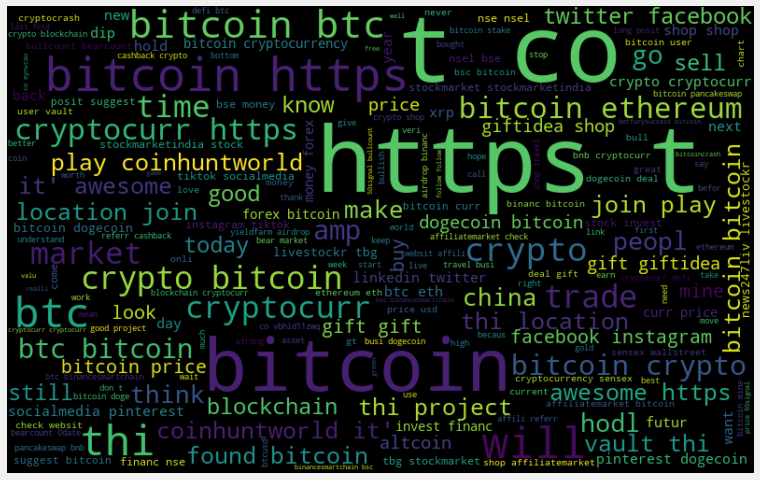

In [17]:
all_words = " ".join([x for x in df['CleanTweets']])

from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height=500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# hashtag
def hashtagTweets(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [19]:
hashtag = hashtagTweets(df['CleanTweets']) 
hashtag[:6]

[['bitcoin'],
 ['allgamestoken', 'airdrop', 'binancesmartchain', 'bitcoin'],
 ['bitcoin'],
 ['bitcoin'],
 ['bin', 'bitcoin', 'signal', 'buy', 'hntusdt', 'hnt'],
 ['bitcoin']]

In [20]:
hashtag = sum(hashtag, [])
hashtag[:6]
            

['bitcoin',
 'allgamestoken',
 'airdrop',
 'binancesmartchain',
 'bitcoin',
 'bitcoin']

In [21]:
dist = nltk.FreqDist(hashtag)
d = pd.DataFrame({'Hashtag': list(dist.keys()),
                 'Count': list(dist.values())})
d.head()

,Hashtag,Count
0,bitcoin,3105
1,allgamestoken,18
2,airdrop,142
3,binancesmartchain,91
4,bin,30


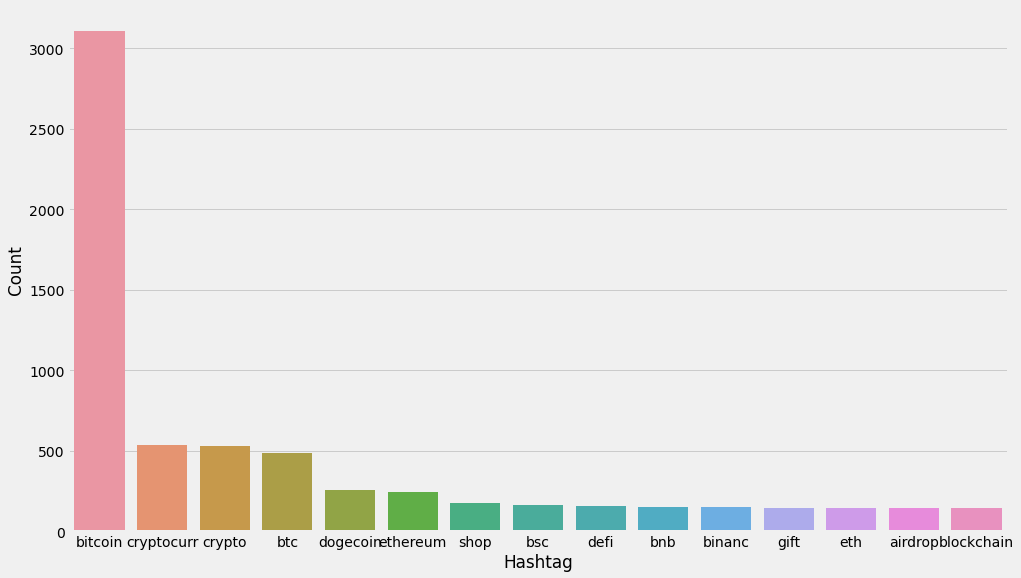

In [22]:
# select most frequently hashtafs
import seaborn as sns
d = d.nlargest(columns='Count',n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag',y='Count')
plt.show()

In [23]:
# function Subjectivity
def getSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity
# function polarity
def detPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

df['Subjectivity'] = df['CleanTweets'].apply(getSubjectivity)
df['Polarity'] = df['CleanTweets'].apply(detPolarity)

In [24]:
df.head(10)

,Tweets,CleanTweets,Subjectivity,Polarity
0,really... great. Monthly #bitcoin buys for te...,really... great. monthli #bitcoin buy ten thou...,0.237500,0.250000
1,"This is a very, very good project ... I wish ...","thi very, veri good project wish good luck acc...",0.500000,0.533333
2,"Hey, thanks for sharing this thread from . Re...","hey, thank share thi thread from read whole ve...",0.400000,0.200000
3,$btc #bitcoin near trendline resistance https:...,$btc #bitcoin near trendlin resist https://t.c...,0.400000,0.100000
4,🚀🚀🚀 $HNT Long Position(v1) 🚀🚀🚀Entry Price: 12....,$hnt long position(v1) 🚀🚀🚀entri price: 12.103t...,0.400000,-0.050000
5,A #Bitcoin prediction by the GOAT himself: htt...,#bitcoin predict goat himself: https://t.co/dt...,0.000000,0.000000
6,Cobalt is the “blood diamond “♦️ of the minera...,cobalt “blood diamond miner world. everi elect...,0.000000,0.000000
7,Iran has banned crypto mining which is set to ...,iran ban crypto mine which last four months.it...,0.066667,0.000000
8,Volcano #bitcoin mining comming soon https://t...,volcano #bitcoin mine com soon https://t.co/4q...,0.000000,0.000000
9,Hey Brian when are you going to unlock my Bi...,brian when go unlock binanceu account? it' mon...,0.000000,0.000000


In [63]:
# function text Sentiment text
def getSentiment(score):
    if score > 0 :
        return 'Positive'
    elif score == 0: 
        return 'Neutral'
    else:
        return 'Negative'

In [64]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.to_csv('BitcoinTweet.csv', index=False)

In [65]:
df = pd.read_csv('BitcoinTweet.csv')

In [66]:
df.tail(20)

,Tweets,CleanTweets,Subjectivity,Polarity,Sentiment
2980,#linkedin #twitter #facebook #instagram #tikto...,#linkedin #twitter #facebook #instagram #tikto...,0.000000,0.000000,Neutral
2981,"The disconnect between nations, corporations ...","disconnect between nations, corpor wealthi inv...",0.428571,0.214286,Positive
2982,Mark Cuban says #bitcoin #BTC is 'better than ...,mark cuban say #bitcoin #btc 'better than gold...,0.500000,0.500000,Positive
2983,#Bitcoin is making lower low and lower top... ...,#bitcoin make lower lower top... will thi scar...,0.500000,0.500000,Positive
2984,I realized that holding on to bitcoin wasn't t...,realiz that hold bitcoin wasn't onli way. howe...,0.500000,0.500000,Positive
2985,This is the roller coaster that let go of your...,thi roller coaster that your greed small profi...,0.400000,-0.250000,Negative
2986,Don’t buy the top! #Bitcoin,don’t top! #bitcoin,0.500000,0.625000,Positive
2987,I found #bitcoin in a User vault at this locat...,found #bitcoin user vault thi location! join p...,1.000000,1.000000,Positive
2988,➡️Task (3/4) Nice project 0x1f0fdB868E310b69...,➡️task (3/4) nice project 0x1f0fdb868e310b6935...,1.000000,0.600000,Positive
2989,Everytime Im selling #Bitcoin down 🥱😂,everytim sell #bitcoin down,0.288889,-0.155556,Negative


In [67]:
df.shape[0]

3000

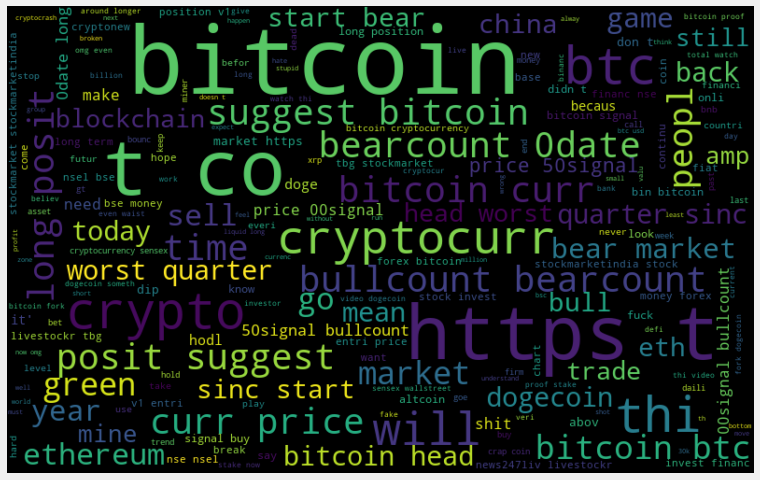

In [68]:
all_words = " ".join([x for x in df['CleanTweets'][df['Sentiment']=='Negative']])

from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height=500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

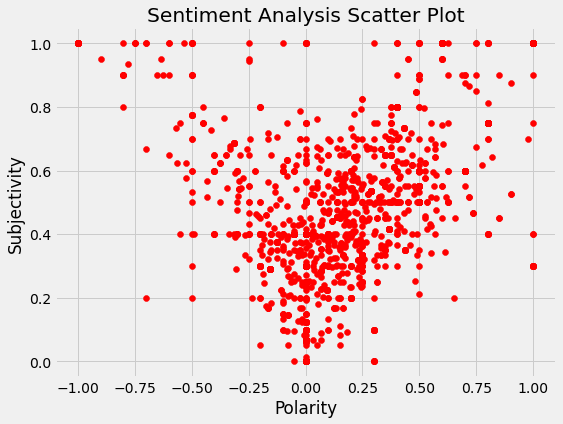

In [69]:
#Scatter plot for subjectivity and polarity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

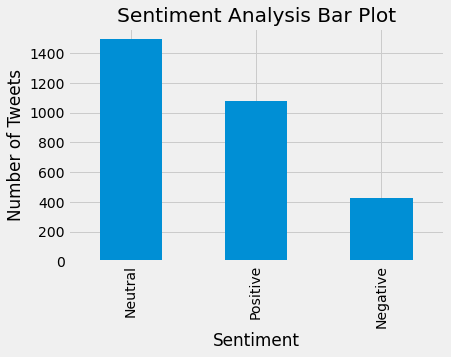

In [70]:
# bar chart
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [71]:
# bow
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [72]:
tfidf = TfidfVectorizer(max_features=10000)
x = df['CleanTweets']
y = df['Sentiment']

In [73]:
x = tfidf.fit_transform(x)

In [74]:
x

<3000x9338 sparse matrix of type '<class 'numpy.float64'>'
	with 49120 stored elements in Compressed Sparse Row format>

In [75]:
y

0       Positive
1       Positive
2       Positive
3       Positive
4       Negative
          ...   
2995     Neutral
2996    Negative
2997     Neutral
2998    Positive
2999     Neutral
Name: Sentiment, Length: 3000, dtype: object

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [77]:
x_train.shape

(2250, 9338)

In [78]:
x_train.shape, x_test.shape

((2250, 9338), (750, 9338))

In [79]:
y_train.shape, y_test.shape

((2250,), (750,))

In [80]:
x_train[0]

<1x9338 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [81]:
# mOdelTraining
import pickle
from sklearn.metrics import f1_score, accuracy_score

In [82]:
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [83]:
y_predict = model.predict(x_test)

In [84]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n    Negative       0.88      0.51      0.64       114\n     Neutral       0.77      0.94      0.84       362\n    Positive       0.86      0.76      0.81       274\n\n    accuracy                           0.81       750\n   macro avg       0.84      0.74      0.77       750\nweighted avg       0.82      0.81      0.80       750\n'

In [ ]:

while True:
    a = input('Type your Comment: ') 
    vec = tfidf.transform([a])
    result = model.predict(vec)
    if result=='Positive':
        print('Positive Comment')
    elif result=='Neutral':
        print('Neutral Comment')
    else:
        print('Negative Comment')

    

Type your Comment: bitcoin will decide our future.
Neutral Comment
Type your Comment: bitcoin is useless
Negative Comment
Type your Comment: earning bitcoin is good
Positive Comment
